<h3>Testing Notebook</h3>

In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 43 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 75
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=1, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/75 [00:13<17:04, 13.84s/it]

Epoch 001: | Training Loss: 2.123799067108575 | Validation Loss: 2.073781607347891


  3%|██▏                                                                                | 2/75 [00:26<16:11, 13.31s/it]

Epoch 002: | Training Loss: 1.9273015233907806 | Validation Loss: 1.8993041854385937


  4%|███▎                                                                               | 3/75 [00:39<15:42, 13.08s/it]

Epoch 003: | Training Loss: 1.8568880202456075 | Validation Loss: 1.828794230014906


  5%|████▍                                                                              | 4/75 [00:52<15:21, 12.97s/it]

Epoch 004: | Training Loss: 1.9130998297049393 | Validation Loss: 1.9121419978797982


  7%|█████▌                                                                             | 5/75 [01:05<15:07, 12.96s/it]

Epoch 005: | Training Loss: 1.8566633244944057 | Validation Loss: 1.8505531975982386


  8%|██████▋                                                                            | 6/75 [01:18<14:51, 12.92s/it]

Epoch 006: | Training Loss: 1.8268857149595625 | Validation Loss: 1.8183827979849019


  9%|███████▋                                                                           | 7/75 [01:30<14:31, 12.82s/it]

Epoch 007: | Training Loss: 1.8332660055745 | Validation Loss: 1.801315521975176


 11%|████████▊                                                                          | 8/75 [01:43<14:23, 12.89s/it]

Epoch 008: | Training Loss: 2.026818513139641 | Validation Loss: 1.9349783057466559


 12%|█████████▉                                                                         | 9/75 [01:56<14:10, 12.88s/it]

Epoch 009: | Training Loss: 1.9486923870441253 | Validation Loss: 2.064874480623718


 13%|██████████▉                                                                       | 10/75 [02:09<14:01, 12.95s/it]

Epoch 010: | Training Loss: 1.9127044823854036 | Validation Loss: 1.9089330237939817


 15%|████████████                                                                      | 11/75 [02:22<13:44, 12.88s/it]

Epoch 011: | Training Loss: 1.875601806728297 | Validation Loss: 1.8593848998393487


 16%|█████████████                                                                     | 12/75 [02:35<13:29, 12.86s/it]

Epoch 012: | Training Loss: 1.904938470355337 | Validation Loss: 1.8831799938044418


 17%|██████████████▏                                                                   | 13/75 [02:48<13:21, 12.93s/it]

Epoch 013: | Training Loss: 2.0656370885282054 | Validation Loss: 2.140145098397491


 19%|███████████████▎                                                                  | 14/75 [03:01<13:08, 12.93s/it]

Epoch 014: | Training Loss: 2.0055968204971717 | Validation Loss: 1.8779384269626862


 20%|████████████████▍                                                                 | 15/75 [03:14<12:55, 12.92s/it]

Epoch 015: | Training Loss: 1.8737228704546032 | Validation Loss: 1.8006574112340945


 21%|█████████████████▍                                                                | 16/75 [03:27<12:42, 12.92s/it]

Epoch 016: | Training Loss: 1.7924688206995105 | Validation Loss: 1.7920662459977177


 23%|██████████████████▌                                                               | 17/75 [03:40<12:41, 13.13s/it]

Epoch 017: | Training Loss: 1.7625959110698368 | Validation Loss: 1.7567267702260148


 24%|███████████████████▋                                                              | 18/75 [03:53<12:27, 13.12s/it]

Epoch 018: | Training Loss: 1.7322948670606448 | Validation Loss: 1.7459042433205


 25%|████████████████████▊                                                             | 19/75 [04:06<12:08, 13.01s/it]

Epoch 019: | Training Loss: 1.70368691058154 | Validation Loss: 1.7247434963873767


 27%|█████████████████████▊                                                            | 20/75 [04:19<12:00, 13.09s/it]

Epoch 020: | Training Loss: 1.676633778582798 | Validation Loss: 1.748874084665141


 28%|██████████████████████▉                                                           | 21/75 [04:33<11:47, 13.11s/it]

Epoch 021: | Training Loss: 1.6585730406797212 | Validation Loss: 1.6353997353020064


 29%|████████████████████████                                                          | 22/75 [04:45<11:30, 13.04s/it]

Epoch 022: | Training Loss: 1.7081819508487284 | Validation Loss: 2.1092683525260436


 31%|█████████████████████████▏                                                        | 23/75 [04:58<11:14, 12.97s/it]

Epoch 023: | Training Loss: 1.9194220567504525 | Validation Loss: 1.8601515063452065


 32%|██████████████████████████▏                                                       | 24/75 [05:11<10:55, 12.85s/it]

Epoch 024: | Training Loss: 1.804529931133687 | Validation Loss: 1.8162631890095702


 33%|███████████████████████████▎                                                      | 25/75 [05:23<10:39, 12.79s/it]

Epoch 025: | Training Loss: 1.76337032554342 | Validation Loss: 1.7700757805360567


 35%|████████████████████████████▍                                                     | 26/75 [05:37<10:31, 12.89s/it]

Epoch 026: | Training Loss: 1.7068358632955658 | Validation Loss: 1.7034529655351551


 36%|█████████████████████████████▌                                                    | 27/75 [05:50<10:19, 12.90s/it]

Epoch 027: | Training Loss: 1.6623378496491508 | Validation Loss: 1.6718040781283596


 37%|██████████████████████████████▌                                                   | 28/75 [06:02<10:06, 12.91s/it]

Epoch 028: | Training Loss: 1.63110665305764 | Validation Loss: 1.61728705178707


 39%|███████████████████████████████▋                                                  | 29/75 [06:16<09:56, 12.97s/it]

Epoch 029: | Training Loss: 1.6316396907595985 | Validation Loss: 1.6576262789035061


 40%|████████████████████████████████▊                                                 | 30/75 [06:29<09:45, 13.01s/it]

Epoch 030: | Training Loss: 1.6182868968965571 | Validation Loss: 1.5887915880308239


 41%|█████████████████████████████████▉                                                | 31/75 [06:41<09:26, 12.88s/it]

Epoch 031: | Training Loss: 1.592573103183867 | Validation Loss: 1.6104006636033363


 43%|██████████████████████████████████▉                                               | 32/75 [06:54<09:10, 12.80s/it]

Epoch 032: | Training Loss: 1.5688171362365473 | Validation Loss: 1.5791027786534861


 44%|████████████████████████████████████                                              | 33/75 [07:07<08:59, 12.84s/it]

Epoch 033: | Training Loss: 1.5496148436622308 | Validation Loss: 1.5249164673166538


 45%|█████████████████████████████████████▏                                            | 34/75 [07:20<08:47, 12.87s/it]

Epoch 034: | Training Loss: 1.532579326653992 | Validation Loss: 1.660071283305457


 47%|██████████████████████████████████████▎                                           | 35/75 [07:33<08:38, 12.96s/it]

Epoch 035: | Training Loss: 1.5246239458577018 | Validation Loss: 1.5095111241034411


 48%|███████████████████████████████████████▎                                          | 36/75 [07:46<08:30, 13.09s/it]

Epoch 036: | Training Loss: 1.498453253866825 | Validation Loss: 1.4727272101498525


 49%|████████████████████████████████████████▍                                         | 37/75 [07:59<08:16, 13.06s/it]

Epoch 037: | Training Loss: 1.4775040992312096 | Validation Loss: 1.4851354874602152


 51%|█████████████████████████████████████████▌                                        | 38/75 [08:13<08:05, 13.13s/it]

Epoch 038: | Training Loss: 1.458689692375974 | Validation Loss: 1.4751615743024633


 52%|██████████████████████████████████████████▋                                       | 39/75 [08:25<07:44, 12.91s/it]

Epoch 039: | Training Loss: 1.44744448745823 | Validation Loss: 1.4334651822343878


 53%|███████████████████████████████████████████▋                                      | 40/75 [08:37<07:26, 12.76s/it]

Epoch 040: | Training Loss: 1.42710941457651 | Validation Loss: 1.4220167376579496


 55%|████████████████████████████████████████████▊                                     | 41/75 [08:50<07:14, 12.77s/it]

Epoch 041: | Training Loss: 1.4739384497758439 | Validation Loss: 1.456274722694257


 56%|█████████████████████████████████████████████▉                                    | 42/75 [09:03<06:59, 12.72s/it]

Epoch 042: | Training Loss: 1.4268012312873513 | Validation Loss: 1.4248211394756212


 57%|███████████████████████████████████████████████                                   | 43/75 [09:16<06:50, 12.81s/it]

Epoch 043: | Training Loss: 1.4098286686562176 | Validation Loss: 1.406199589781805


 59%|████████████████████████████████████████████████                                  | 44/75 [09:29<06:40, 12.92s/it]

Epoch 044: | Training Loss: 1.411268068650648 | Validation Loss: 1.659172265901478


 60%|█████████████████████████████████████████████████▏                                | 45/75 [09:42<06:28, 12.95s/it]

Epoch 045: | Training Loss: 1.5023017820956392 | Validation Loss: 1.4382205151636667


 61%|██████████████████████████████████████████████████▎                               | 46/75 [09:55<06:17, 13.03s/it]

Epoch 046: | Training Loss: 1.4626345248461012 | Validation Loss: 1.577141829586904


 63%|███████████████████████████████████████████████████▍                              | 47/75 [10:08<06:01, 12.91s/it]

Epoch 047: | Training Loss: 1.6139131377739366 | Validation Loss: 1.5865971976463948


 64%|████████████████████████████████████████████████████▍                             | 48/75 [10:21<05:47, 12.86s/it]

Epoch 048: | Training Loss: 1.5433290696363284 | Validation Loss: 1.5155619109442475


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [10:33<05:34, 12.87s/it]

Epoch 049: | Training Loss: 1.4860432102317342 | Validation Loss: 1.4779356947732627


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [10:46<05:21, 12.86s/it]

Epoch 050: | Training Loss: 1.4529980592756886 | Validation Loss: 1.4705283051237055


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [10:59<05:09, 12.91s/it]

Epoch 051: | Training Loss: 1.4314360382364524 | Validation Loss: 1.4551829044971991


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [11:12<04:53, 12.78s/it]

Epoch 052: | Training Loss: 1.4154621859493002 | Validation Loss: 1.4205697042132737


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [11:25<04:42, 12.84s/it]

Epoch 053: | Training Loss: 1.390689232558834 | Validation Loss: 1.4033745560077353


 72%|███████████████████████████████████████████████████████████                       | 54/75 [11:38<04:28, 12.81s/it]

Epoch 054: | Training Loss: 1.3807705389345264 | Validation Loss: 1.4018300181135126


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [11:50<04:15, 12.79s/it]

Epoch 055: | Training Loss: 1.3694886603564846 | Validation Loss: 1.3738522781144589


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [12:03<04:05, 12.91s/it]

Epoch 056: | Training Loss: 1.3604041101740134 | Validation Loss: 1.3730552787080816


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [12:17<03:53, 12.99s/it]

Epoch 057: | Training Loss: 1.3568791762922832 | Validation Loss: 1.3945680096608783


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [12:29<03:39, 12.94s/it]

Epoch 058: | Training Loss: 1.3408301315280828 | Validation Loss: 1.3493750839058412


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [12:42<03:27, 12.95s/it]

Epoch 059: | Training Loss: 1.3373487213658848 | Validation Loss: 1.4250943256080697


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [12:55<03:13, 12.93s/it]

Epoch 060: | Training Loss: 1.3224426709473194 | Validation Loss: 1.3498029872911785


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [13:09<03:02, 13.06s/it]

Epoch 061: | Training Loss: 1.3162289796372355 | Validation Loss: 1.325757551083871


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [13:22<02:49, 13.02s/it]

Epoch 062: | Training Loss: 1.3045087334936802 | Validation Loss: 1.302442187562995


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [13:35<02:36, 13.06s/it]

Epoch 063: | Training Loss: 1.2985628084094094 | Validation Loss: 1.324076073979019


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [13:48<02:24, 13.10s/it]

Epoch 064: | Training Loss: 1.3052516168057615 | Validation Loss: 1.2896894889140347


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [14:01<02:10, 13.05s/it]

Epoch 065: | Training Loss: 1.2833863164967 | Validation Loss: 1.3388820591322872


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [14:14<01:56, 12.97s/it]

Epoch 066: | Training Loss: 1.285293529116462 | Validation Loss: 1.2817238738777441


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [14:27<01:43, 12.99s/it]

Epoch 067: | Training Loss: 1.3040851705286183 | Validation Loss: 1.4929681032075794


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [14:40<01:31, 13.04s/it]

Epoch 068: | Training Loss: 1.288749996135135 | Validation Loss: 1.2924556108789707


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [14:53<01:17, 12.95s/it]

Epoch 069: | Training Loss: 1.2675309670105408 | Validation Loss: 1.326872954674817


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [15:05<01:04, 12.91s/it]

Epoch 070: | Training Loss: 1.248396067867727 | Validation Loss: 1.2876676660065258


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [15:18<00:51, 12.85s/it]

Epoch 071: | Training Loss: 1.2452425832524363 | Validation Loss: 1.2796629508700939


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [15:31<00:38, 12.88s/it]

Epoch 072: | Training Loss: 1.2493884629199892 | Validation Loss: 1.2572901631714006


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [15:44<00:25, 12.91s/it]

Epoch 073: | Training Loss: 1.236471595450003 | Validation Loss: 1.2954262959847755


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [15:57<00:12, 12.97s/it]

Epoch 074: | Training Loss: 1.2223997560536168 | Validation Loss: 1.3284471073281874


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [16:10<00:00, 12.94s/it]

Epoch 075: | Training Loss: 1.2221420850220448 | Validation Loss: 1.2647991836617847


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:6956]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,7,7
1,6,5
2,5,3
3,0,3
4,2,3
...,...,...
6951,7,7
6952,3,6
6953,4,0
6954,7,3


In [30]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.5368027602070156


In [26]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm3.pth')

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

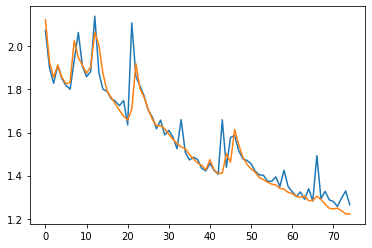

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

1 LSTM layer seems to have far worse accuracy than 2 LSTM layers; unexpected validation/training loss plot 